In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
def find_cost(X,Y,theta):
  
  m=len(Y)
  h=np.dot(X,theta)
  J=(1/2*m)*np.sum(np.square(h-Y))
  return J

In [5]:
import pandas as pd
ds1=pd.read_csv("/content/drive/My Drive/Datasets/Question-4/weather.csv")
ds1 = ds1.sample(frac=1).reset_index(drop=True)
print(ds1)

# print(ds1.isnull().sum())


                      Formatted Date  ...                                      Daily Summary
0      2016-04-09 21:00:00.000 +0200  ...                       Overcast throughout the day.
1      2008-12-07 03:00:00.000 +0100  ...                  Mostly cloudy throughout the day.
2      2015-07-07 15:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
3      2012-05-05 07:00:00.000 +0200  ...             Partly cloudy starting in the morning.
4      2007-03-24 22:00:00.000 +0100  ...                         Mostly cloudy until night.
...                              ...  ...                                                ...
77280  2016-07-22 23:00:00.000 +0200  ...                         Partly cloudy until night.
77281  2007-04-19 15:00:00.000 +0200  ...                       Partly cloudy until evening.
77282  2010-09-18 14:00:00.000 +0200  ...                  Mostly cloudy throughout the day.
77283  2015-01-29 10:00:00.000 +0100  ...                             

## **Checking for null values:-**

In [6]:
print(ds1.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 404
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


# **Data Preprosseing**

In [7]:
ds1=ds1.iloc[:,1:]
ds1

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Overcast,rain,12.038889,12.038889,0.75,12.6868,290,9.9820,1004.44,Overcast throughout the day.
1,Overcast,rain,4.377778,1.155556,0.89,14.0392,310,9.9015,1011.40,Mostly cloudy throughout the day.
2,Partly Cloudy,rain,35.183333,35.566667,0.33,9.2253,211,16.1000,1014.28,Partly cloudy starting in the afternoon contin...
3,Partly Cloudy,rain,12.777778,12.777778,0.90,8.0500,180,11.2700,1008.60,Partly cloudy starting in the morning.
4,Mostly Cloudy,rain,6.905556,3.983333,0.81,15.9390,78,14.0553,1015.17,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...
77280,Clear,rain,20.727778,20.727778,0.89,0.1932,34,15.5526,1015.47,Partly cloudy until night.
77281,Mostly Cloudy,rain,16.161111,16.161111,0.28,8.8711,354,9.9820,1019.46,Partly cloudy until evening.
77282,Overcast,rain,17.100000,17.100000,0.76,12.2199,315,11.4471,1018.06,Mostly cloudy throughout the day.
77283,Overcast,rain,0.944444,-4.233333,0.87,21.4935,143,7.6153,1005.72,Foggy overnight.


**Filling NULL with No :-**

In [8]:
ds1['Precip Type'].fillna("No", inplace = True) 
print(ds1.isnull().sum())

print("\n\nThere are no null value in any column")


Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


There are no null value in any column


## **One Hot Encoding:-**
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. 

In [9]:
t_np1=pd.get_dummies(ds1["Precip Type"])
t_np1=t_np1.to_numpy()
t_np1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

## **Vectorizer**

In [0]:
vectorizer = TfidfVectorizer()
t_np2 = vectorizer.fit_transform(ds1["Summary"])
t_np2 = t_np2.toarray()


### **Extracting Lables**

In [0]:
train_labels=ds1.iloc[0:70000,3].to_numpy()
test_labels=ds1.iloc[70000:,3].to_numpy()

train_labels=np.array([train_labels])
train_labels=train_labels.T

test_labels=np.array([test_labels])
test_labels=test_labels.T

**Dropping Columns**

In [0]:
ds1=ds1.drop(['Apparent Temperature (C)','Daily Summary','Summary','Precip Type'], axis=1)
t_np3=ds1.to_numpy()

**Concating all data**

In [13]:
data=np.concatenate((t_np1, t_np2,t_np3), axis=1)
print(data,data.shape)

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 2.90000e+02 9.98200e+00
  1.00444e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 3.10000e+02 9.90150e+00
  1.01140e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 2.11000e+02 1.61000e+01
  1.01428e+03]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 3.15000e+02 1.14471e+01
  1.01806e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.43000e+02 7.61530e+00
  1.00572e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 4.00000e+01 9.98200e+00
  1.02100e+03]] (77285, 24)


**Train and Validation**

In [14]:
train_data=data[0:70000,:]
test_data=data[70000:,:]
print(train_data.shape, test_data.shape)

(70000, 24) (7285, 24)


### **Feature scaling**

In [15]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data=scaler.transform(train_data)

scaler = MinMaxScaler()

print(scaler.fit(test_data))
test_data=scaler.transform(test_data)


MinMaxScaler(copy=True, feature_range=(0, 1))


# **Linear Regression**

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $

**Mean squared error:**

It is simply the average of the square of the difference between the original values and the predicted values.

**Mean Absolute Error**

Mean Absolute Error (MAE) is the average vertical distance between each point and the identity line. MAE is also the average horizontal distance between each point and the identity line.


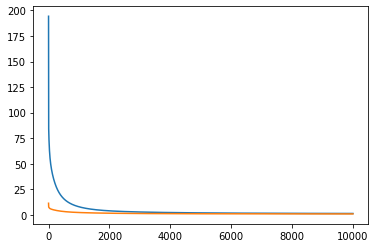

mse->  1.327380224176392
mae->  0.866850085576848
r2->  0.9881410261029617


In [25]:
from sklearn.metrics import mean_absolute_error
theta=np.random.randn(train_data.shape[1],1)

alpha=.1

cost_mse=[]
cost_mae=[]
itr_array=[]


for i in range(10000):

  m=len(train_labels)
  h=np.dot(train_data,theta)

  theta=theta-(1/m)*alpha*(train_data.T.dot((h-train_labels)))

  mse=mean_squared_error(h,train_labels)
  mae=mean_absolute_error(train_labels,h)
  cost_mse.append(mse)
  cost_mae.append(mae)
  itr_array.append(i)


h=np.dot(test_data,theta)

fig, ax = plt.subplots()
ax.plot(itr_array, cost_mse)
ax.plot(itr_array,cost_mae)
plt.show()
print("mse-> ",mean_squared_error(h,test_labels))
print("mae-> ",mean_absolute_error(test_labels,h))
print("r2-> ",r2_score(test_labels,h))

## Mean Absolute Percentage Error

In [26]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def m_a_p_e(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
    
print("MAPE-> ",m_a_p_e(test_labels,h))

MAPE->  46.15954027096695


Theta-1-->  [[ 1.58756537]
 [-0.38824049]
 [ 0.40540152]
 [-0.08074572]
 [ 0.04918847]
 [ 0.74814215]
 [ 0.1912977 ]
 [ 0.00456513]
 [-0.2848141 ]
 [ 0.49644216]
 [ 0.26104288]
 [-1.21218964]
 [-0.63556725]
 [ 0.59604265]
 [-0.28044747]
 [-1.60083934]
 [-1.02104567]
 [ 0.48150378]
 [-0.68397947]
 [-3.66435835]
 [ 1.54272896]
 [ 0.52576627]
 [-1.32982516]
 [ 0.49984044]]
Theta-2-->  [[ 0.00901657]
 [ 1.02399705]
 [-0.67308867]
 [ 0.74973058]
 [ 1.55145837]
 [ 1.01723596]
 [ 0.10827802]
 [-1.33910955]
 [ 0.91824404]
 [ 1.07590473]
 [-0.3027156 ]
 [ 0.3045733 ]
 [ 0.01526583]
 [-2.58395217]
 [ 1.08519431]
 [ 1.31519634]
 [ 0.06864189]
 [ 0.54804904]
 [-0.17105201]
 [-1.44688658]
 [-1.61948434]
 [ 0.11817803]
 [ 0.70834674]
 [ 1.57063947]]
Theta-3-->  [[-0.78396161]
 [-0.01002164]
 [-0.20376894]
 [-1.55555298]
 [ 0.27921628]
 [-0.33186672]
 [-0.85361273]
 [-0.0592463 ]
 [-0.4374969 ]
 [-0.54694713]
 [-1.76917006]
 [ 1.50457234]
 [ 0.21096867]
 [ 1.35502079]
 [ 0.68577575]
 [ 0.97179352]
 [

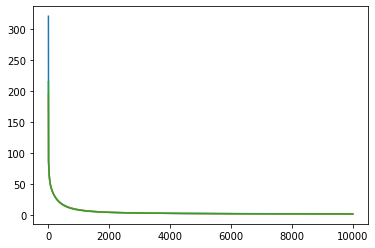

In [28]:
all_theta=[]
all_cost=[]
alpha=0.1
for itr in range(3):
  theta=np.random.randn(train_data.shape[1],1)

  train_data.shape[1]

  all_theta.append(theta)
  cost_array=[]
  itr_array=[]

  m=len(train_labels[:])

  for i in range(10000):
      
    h=np.dot(train_data,theta)

    theta=theta-(1/m)*alpha*(train_data.T.dot((h-train_labels)))

    cost=mean_squared_error(h,train_labels)
    cost_array.append(cost)
    itr_array.append(i)

  all_cost.append(cost_array)  

print("Theta-1--> ", all_theta[0])
print("Theta-2--> ", all_theta[1])
print("Theta-3--> ", all_theta[2])

plt.plot( itr_array, all_cost[0] )
plt.plot( itr_array, all_cost[1] )
plt.plot( itr_array, all_cost[2] )
# plt.legend(['', '', ''], loc='upper left')

plt.show()